<a href="https://colab.research.google.com/github/Akhil-2001/Recurrance_Prediction/blob/main/RecPred_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

In [6]:
col_names=['id', 'outcome', 'time', 'radius_mean',	'texture_mean',	'perimeter_mean',	'area_mean',	'smoothness_mean',	'compactness_mean',	'concavity_mean',	'concave_points_mean',	'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',	'perimeter_worst',	'area_worst',	'smoothness_worst', 'compactness_worst',	'concavity_worst',	'concave_points_worst',	'symmetry_worst',	'fractal_dimension_worst', 'tumor_size', 'lymph_node_status'	]

In [7]:
len(col_names)

35

In [8]:
COLUMNS_COUNT = 36

# with open('wpbc.data', 'r') as f:
#     columns = [next(f).strip() for line in range(COLUMNS_COUNT)]

temp_df = pd.read_csv('https://raw.githubusercontent.com/Akhil-2001/Recurrance_Prediction/main/wpbc.data', skiprows=COLUMNS_COUNT, header=None, delimiter=',', skip_blank_lines=False)

temp_df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,856385,N,76,13.17,21.81,85.42,531.5,0.09714,0.10470,0.08259,...,105.5,740.7,0.15030,0.3904,0.3728,0.16070,0.3693,0.09618,1.7,1
1,857010,R,8,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.19740,...,150.6,1567.0,0.16790,0.5090,0.7345,0.23780,0.3799,0.09185,1.8,0
2,85715,N,111,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,...,102.8,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790,1.0,1
3,857438,R,48,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,...,117.7,1030.0,0.13890,0.2057,0.2712,0.15300,0.2675,0.07873,2.5,0
4,857637,R,11,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,...,170.1,2145.0,0.16240,0.3511,0.3879,0.20910,0.3537,0.08294,3.2,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.1,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
158,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.6,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
159,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.5,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
160,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.3,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [9]:
temp_df.columns=col_names

In [10]:
temp_df.head()

,id,outcome,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
0,856385,N,76,13.17,21.81,85.42,531.5,0.09714,0.10470,0.08259,...,105.5,740.7,0.1503,0.3904,0.3728,0.1607,0.3693,0.09618,1.7,1
1,857010,R,8,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.19740,...,150.6,1567.0,0.1679,0.5090,0.7345,0.2378,0.3799,0.09185,1.8,0
2,85715,N,111,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,...,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.3900,0.11790,1.0,1
3,857438,R,48,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,...,117.7,1030.0,0.1389,0.2057,0.2712,0.1530,0.2675,0.07873,2.5,0
4,857637,R,11,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,...,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294,3.2,13


In [11]:
temp_df.isna().sum()

id                         0
outcome                    0
time                       0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
tumor_size                 0
lymph_node_sta

In [12]:
temp_df.corr()

,id,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size
id,1.000000,-0.078027,0.061475,0.033639,0.062230,0.043803,-0.035191,0.065183,0.032231,0.055200,...,0.010794,0.029793,-0.009363,-0.041299,0.029800,0.052864,0.053905,-0.039584,0.065139,-0.131286
time,-0.078027,1.000000,-0.268175,-0.239927,-0.271600,-0.276558,0.121084,-0.020511,-0.109765,-0.152151,...,-0.151258,-0.231271,-0.204376,0.197341,0.066482,0.019463,-0.040414,0.177218,0.224445,-0.128776
radius_mean,0.061475,-0.268175,1.000000,0.140011,0.995927,0.992889,-0.067268,0.249847,0.520037,0.703289,...,-0.039593,0.929104,0.894953,-0.328530,-0.070296,0.130305,0.437328,-0.167183,-0.365863,0.187292
texture_mean,0.033639,-0.239927,0.140011,1.000000,0.142543,0.134290,-0.182586,0.025396,0.075342,0.043737,...,0.865154,0.146701,0.127297,-0.106008,0.037148,0.037327,-0.009147,-0.155049,-0.048458,0.004536
perimeter_mean,0.062230,-0.271600,0.995927,0.142543,1.000000,0.990708,-0.014296,0.325531,0.579947,0.747508,...,-0.037910,0.934669,0.890745,-0.290605,-0.011986,0.185082,0.484884,-0.150776,-0.313707,0.178369
area_mean,0.043803,-0.276558,0.992889,0.134290,0.990708,1.000000,-0.059366,0.249793,0.522192,0.703110,...,-0.034786,0.940545,0.918984,-0.305772,-0.063478,0.131194,0.442501,-0.174305,-0.351011,0.185711
smoothness_mean,-0.035191,0.121084,-0.067268,-0.182586,-0.014296,-0.059366,1.000000,0.652315,0.642251,0.575304,...,-0.123444,-0.013240,-0.058606,0.703467,0.422498,0.484707,0.547365,0.220193,0.508138,-0.128002
compactness_mean,0.065183,-0.020511,0.249847,0.025396,0.325531,0.249793,0.652315,1.000000,0.847935,0.734332,...,-0.023791,0.320470,0.216389,0.390276,0.754720,0.736507,0.746247,0.307166,0.583139,-0.095601
concavity_mean,0.032231,-0.109765,0.520037,0.075342,0.579947,0.522192,0.642251,0.847935,1.000000,0.912271,...,-0.018972,0.536918,0.445636,0.287310,0.488794,0.715372,0.782346,0.155131,0.303757,-0.028555
concave_points_mean,0.055200,-0.152151,0.703289,0.043737,0.747508,0.703110,0.575304,0.734332,0.912271,1.000000,...,-0.082219,0.696820,0.617483,0.154210,0.305061,0.500068,0.785311,0.058500,0.107679,0.040306


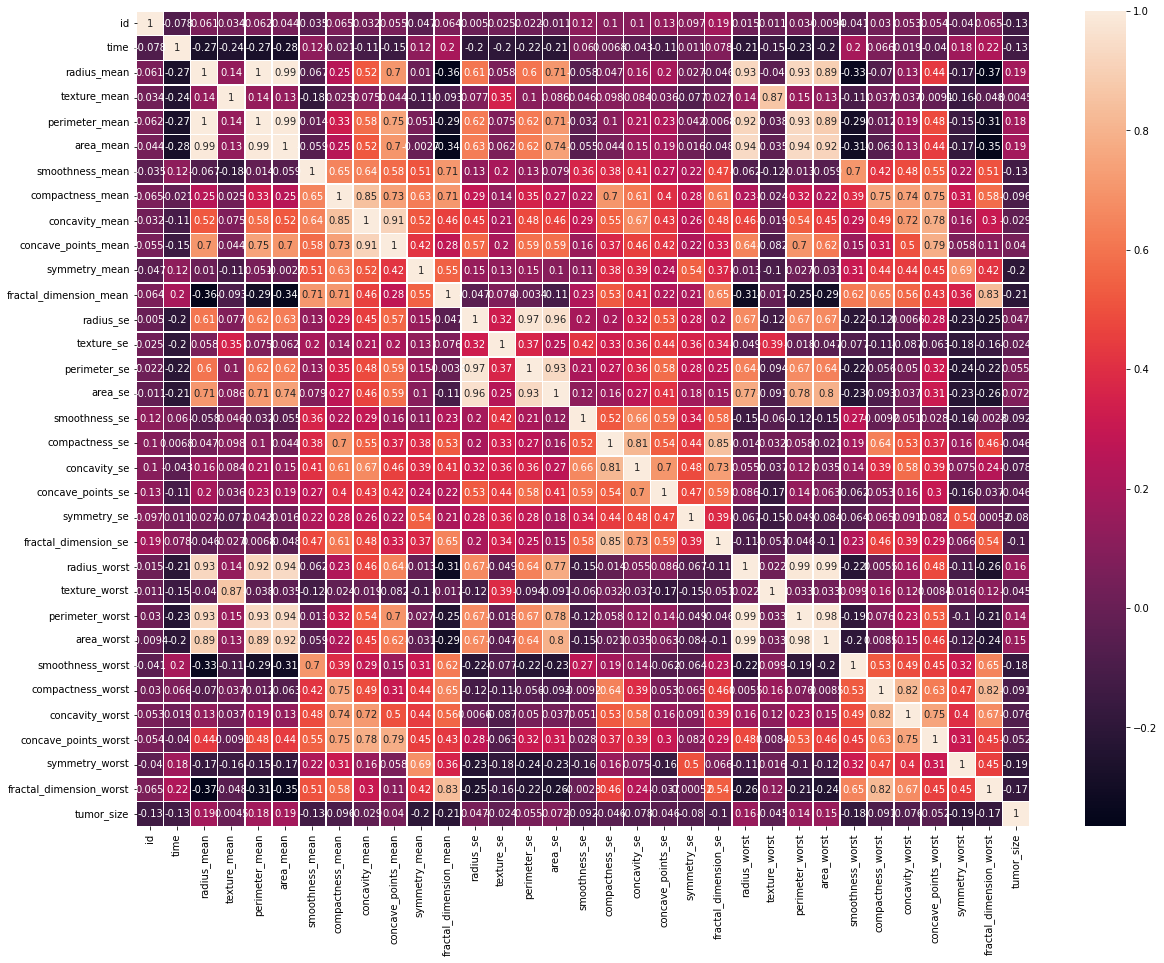

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(temp_df.corr(),ax=ax,annot=True,linewidth=.5)

In [14]:
import math
def pointbi(attr1,attr2): #attr1 is the dichotomous variable and attr2 is the continuous variable
    variable1=[]
    variable0=[]
    for i in range(attr1.shape[0]):
        if attr1.iloc[i] == 'N':
            variable1.append(attr2.iloc[i])
        elif attr1.iloc[i] == 'R':
            variable0.append(attr2.iloc[i])
    sx=attr2.std()
    x0=sum(variable0)/len(variable0)
    x1=sum(variable1)/len(variable1)
    n0=len(variable0)
    n1=len(variable1)
    n=n0+n1
    z=x1-x0/sx
    k=math.sqrt((n0*n1)/(n*(n-1)))
    return (x1-x0)*k/sx

In [15]:
df = temp_df

In [16]:
df['outcome'].value_counts()

N    122
R     40
Name: outcome, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
df['lymph_node_status'] = LabelEncoder().fit_transform(df['lymph_node_status'].values)

In [18]:
df['lymph_node_status'].value_counts()

0     68
1     29
9     15
15    10
18     6
14     4
20     4
3      4
5      3
2      3
17     2
13     2
21     2
19     2
7      1
4      1
16     1
12     1
8      1
6      1
10     1
11     1
Name: lymph_node_status, dtype: int64

In [19]:
X = df.iloc[:,3:].values
y = df.iloc[:,1].values

In [20]:
labelencode = LabelEncoder()
y=labelencode.fit_transform(y)

df['outcome']=y=labelencode.fit_transform(y)
print("Reccur: ",(y == 1).sum())

Reccur:  40


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=None)
print("Reccur: ",(y_train == 1).sum())

Reccur:  37


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

model = make_pipeline(LogisticRegression())
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('logisticregression', LogisticRegression())])

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

y_pred = model.predict(X_test)

print("accuracy: ",accuracy_score(y_test,y_pred))
print("F1_score: ",f1_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))

accuracy:  0.8823529411764706
F1_score:  0.5
Recall:  0.3333333333333333


In [24]:
clf = SVC(gamma=0.01, C=100)
clf.fit(X_train, y_train)  

red = clf.predict(X_test)

print("accuracy: ",accuracy_score(y_test,red))
print("F1_score: ",f1_score(y_test,red))
print("Recall: ",recall_score(y_test,red))

accuracy:  0.8235294117647058
F1_score:  0.0
Recall:  0.0


In [25]:
confusion_matrix(y_test,y_pred)

array([[14,  0],
       [ 2,  1]])

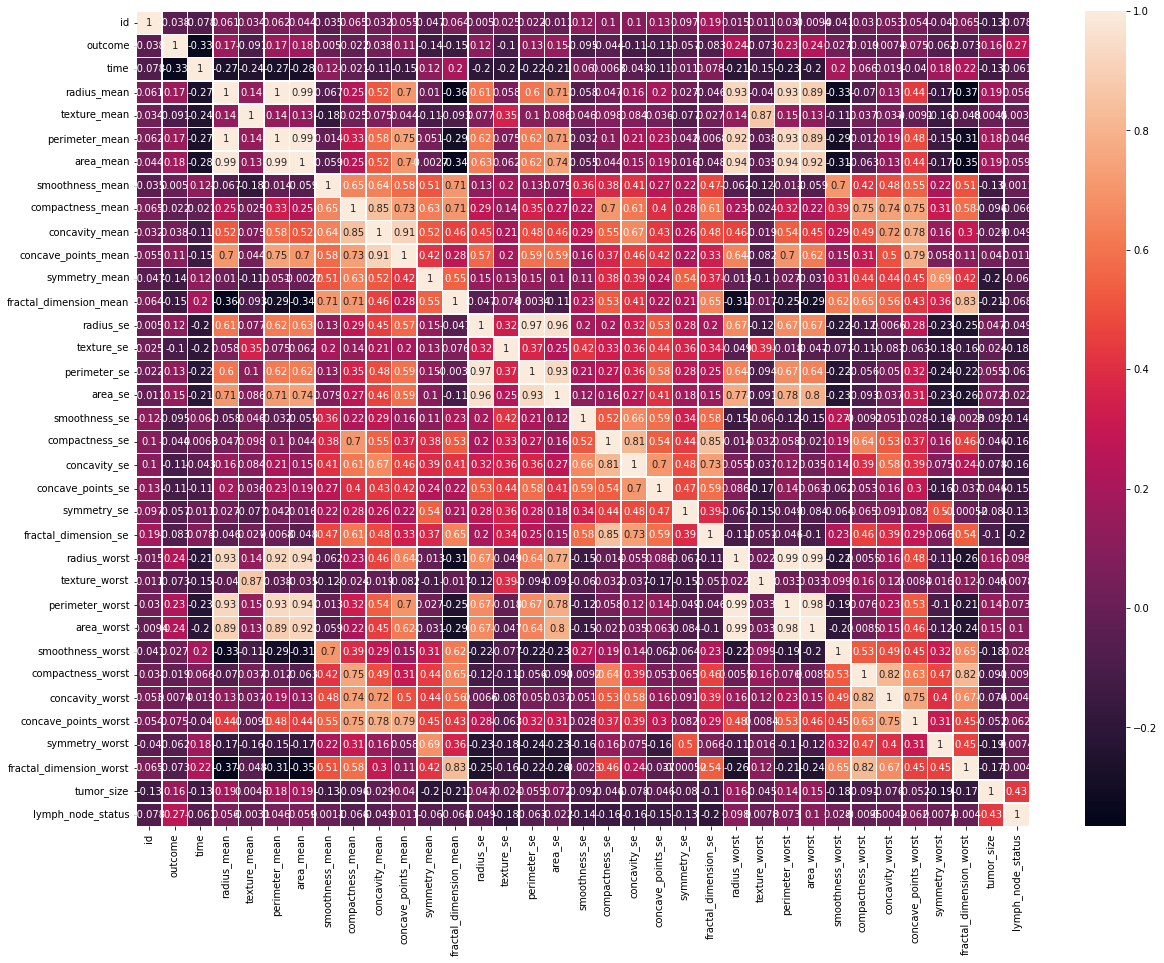

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df.corr(),ax=ax,annot=True,linewidth=.5)

In [52]:
import tensorflow as tf




model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape = (32,)))
#model1.add(tf.keras.layers.Dropout(0.1))
model1.add(tf.keras.layers.Dense(units = 50, activation = 'relu'))
#model1.add(tf.keras.layers.Dropout(0.1))
model1.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

model1.compile(optimizer = 'Adagrad', loss ='binary_crossentropy', metrics=[tf.metrics.Recall(),'accuracy'])
model1.fit(X_train, y_train, epochs=35, validation_data=[X_test,y_test])


red = model1.predict(X_test)

print(red)

Epoch 1/35
5/5 [==============================] - 2s 131ms/step - loss: 25.4365 - recall_23: 0.6757 - accuracy: 0.4828 - val_loss: 3.2776 - val_recall_23: 0.0000e+00 - val_accuracy: 0.8235
Epoch 2/35
5/5 [==============================] - 0s 12ms/step - loss: 5.0705 - recall_23: 0.2432 - accuracy: 0.6276 - val_loss: 1.8877 - val_recall_23: 0.0000e+00 - val_accuracy: 0.8235
Epoch 3/35
5/5 [==============================] - 0s 13ms/step - loss: 3.8494 - recall_23: 0.1892 - accuracy: 0.6000 - val_loss: 3.0344 - val_recall_23: 0.0000e+00 - val_accuracy: 0.8235
Epoch 4/35
5/5 [==============================] - 0s 14ms/step - loss: 3.7170 - recall_23: 0.2432 - accuracy: 0.6207 - val_loss: 1.7950 - val_recall_23: 0.0000e+00 - val_accuracy: 0.8235
Epoch 5/35
5/5 [==============================] - 0s 16ms/step - loss: 2.3388 - recall_23: 0.2162 - accuracy: 0.6414 - val_loss: 1.9303 - val_recall_23: 0.0000e+00 - val_accuracy: 0.8235
Epoch 6/35
5/5 [==============================] - 0s 13ms/step 

In [53]:
for i in range(len(red)):
  if red[i] >= 0.5:
    red[i] = 1
  else:
    red[i] = 0

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
print("accuracy: ",accuracy_score(y_test,red))
print("recall: ",recall_score(y_test,red))
print("f1: ",f1_score(y_test,red))

accuracy:  0.7058823529411765
recall:  0.6666666666666666
f1:  0.4444444444444444
